In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Load images
perspective_image = cv2.imread('./assets/world_cup_2006.png')
# perspective_image_canny = cv2.Canny(perspective_image, 50, 100)
perspective_image.shape

(720, 1280, 3)

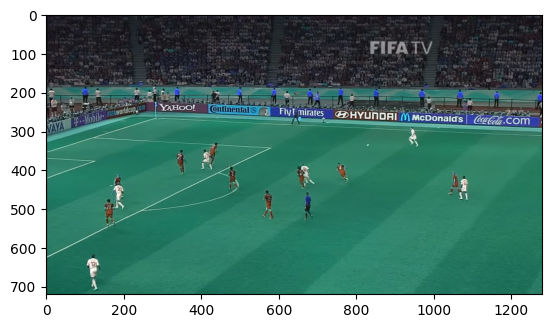

In [13]:
plt.imshow(perspective_image)
plt.axis('on')
plt.show()
template_image = cv2.imread('./assets/world_cup_template.png')

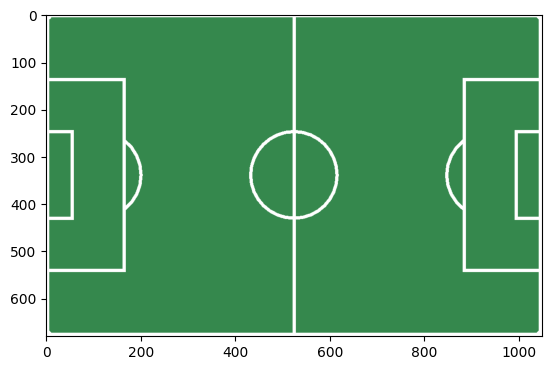

In [14]:
# template_image_canny = cv2.Canny(template_image, 50, 100)
template_image.shape
plt.imshow(template_image)
plt.axis('on')
plt.show()

In [15]:
# Points in the perspective image
points_perspective = np.array([
    [124, 378],  # Example point
    [125, 317],   # Example point
    [578, 348],  # Example point
    [248, 504]   # Example point
], dtype='float32')

In [21]:
# Corresponding points in the template image
points_template = np.array([
    [54, 248],    # Corresponding point
    [165, 138],  # Corresponding point
    [3, 138],   # Corresponding point
    [165, 411]    # Corresponding point
], dtype='float32')

In [22]:
# Compute homography matrix
H, status = cv2.findHomography(points_template, points_perspective)

print(H)

[[ 1.28893520e+00 -9.89845602e-01  1.49676530e+02]
 [ 3.47102146e+00 -2.42818150e+00  3.34877947e+02]
 [ 1.09672912e-02 -7.27236147e-03  1.00000000e+00]]


In [23]:
# Warp the template image
# height, width = perspective_image_canny.shape
height, width, channels = perspective_image.shape
warped_image = cv2.warpPerspective(template_image, H, (width, height))

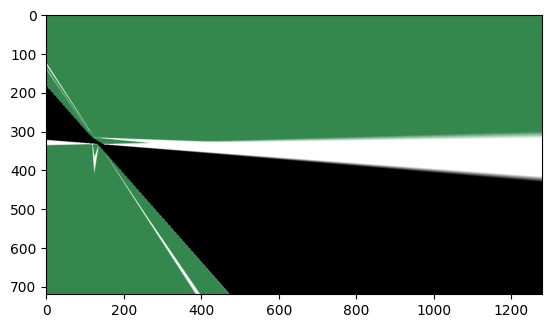

True

In [24]:
# warped_image = cv2.warpPerspective(template_image_canny, H, (width, height))
plt.imshow(warped_image)
plt.axis('on')
plt.show()
cv2.imwrite('./assets/warped_image3.png', warped_image)

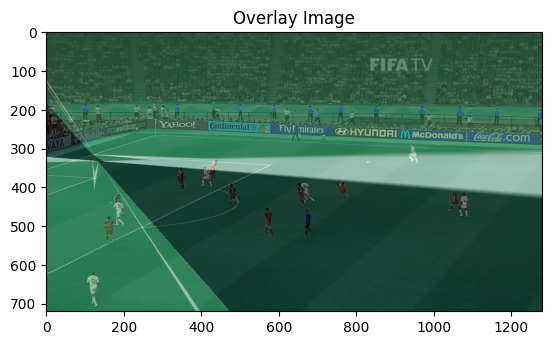

In [25]:
# Show the result overlay
out = (warped_image * 0.5 + perspective_image * 0.5).astype(np.uint8)
# out = (warped_image * 0.5 + perspective_image_canny * 0.5).astype(np.uint8)
plt.figure("Overlay Image")
plt.imshow(out, cmap='gray')
plt.title('Overlay Image')

plt.show()